# Sakurako
---

<img src="../images/sakurako.png" style="width: 300px;">

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math
import os

In [76]:
DATA_DIR = '../data/AAPL/prices.csv'

In [77]:
data = pd.read_csv(DATA_DIR)
data.head()

,Date,Close,Volume,Open,High,Low
0,1361923200000000000,15.8775,586219246,16.0154,16.1586,15.7375
1,1362009600000000000,15.7643,322049711,15.8589,15.9954,15.7643
2,1362096000000000000,15.3739,551278339,15.6429,15.6493,15.3564
3,1362355200000000000,15.0018,577328969,15.2786,15.2929,14.9643
4,1362441600000000000,15.3980,636908185,15.0529,15.5425,15.0268


In [78]:
dataset = data['Close'].values

In [79]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [80]:
dataset = scaler.fit_transform(dataset.reshape(-1, 1)).flatten()

In [81]:
dataset

array([0.01148382, 0.01081026, 0.00848732, ..., 0.80304946, 0.80596504,
       0.78995909])

In [82]:
TRAIN_SIZE = 0.88
WINDOW_SIZE = 1

In [83]:
train_len = int(len(dataset) * TRAIN_SIZE)
test_len = len(dataset) - train_len
print(f'Train Size: {train_len}, Test Size: {test_len}')

Train Size: 2214, Test Size: 303


In [84]:
train = dataset[0:train_len]
test = dataset[train_len + 1: len(dataset) - 1]

In [85]:
def create_X_y(dataset):
    X = []
    y = []

    for i in range(WINDOW_SIZE, len(dataset)):
        X.append(dataset[(i - WINDOW_SIZE):i])
        y.append(dataset[i])

    return np.array(X), np.array(y)

In [86]:
X_train, y_train = create_X_y(train)

In [87]:
X_test, y_test = create_X_y(test)

In [88]:
from xgboost import XGBRegressor

In [97]:
model = XGBRegressor(n_estimators=100000, learning_rate=0.005)
model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

j:\stocks\venv\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.005, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
def show_graph(true, preds):
    plt.figure(figsize = (6, 3))
    plt.plot(scaler.inverse_transform(true.reshape(-1, 1)), label = "True value")
    plt.plot(scaler.inverse_transform(preds.reshape(-1, 1)), label = "Prediction")
    plt.legend()
    plt.show()

In [99]:
train_preds = model.predict(X_train)

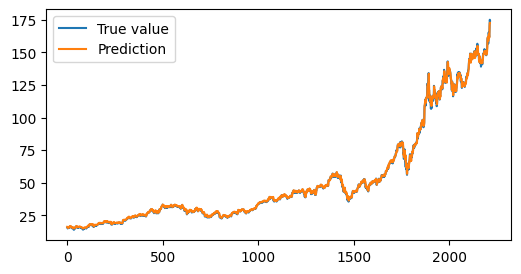

In [100]:
show_graph(y_train, train_preds)

In [101]:
preds = model.predict(X_test)

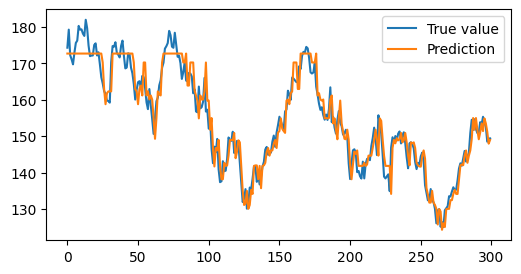

In [102]:
show_graph(y_test, preds)

In [103]:
scaled_preds = scaler.inverse_transform(preds.reshape(-1, 1)).flatten()
scaled_labels = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [104]:
print(f"Mean Squared Error : {math.sqrt(mean_squared_error(scaled_preds, scaled_labels))}")

Mean Squared Error : 3.7057704161880203
